<a href="https://colab.research.google.com/github/rifkiadhim/202055202019_R.Adhim/blob/master/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!mkdir /content/drive/MyDrive/Deep
!cp kaggle.json /content/drive/MyDrive/Deep/

mkdir: cannot create directory ‘/content/drive/MyDrive/Deep’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [1]:
import keras
import numpy as np
import pandas as pd
from PIL import Image as img

In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

Change Image Data Format

In [3]:
keras.backend.image_data_format()

'channels_last'

In [4]:
keras.backend.set_image_data_format("channels_first")
keras.backend.image_data_format()

'channels_first'

Import Data

In [6]:
import zipfile

In [6]:
dataset_zip = zipfile.ZipFile('drive/MyDrive/Deep/train.zip', 'r')

dataset_zip.extractall()

dataset_zip.close()

Data Preview

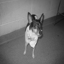

In [ ]:
img.open("train/dog.10002.jpg").resize((64, 64)).convert("L")

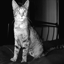

In [ ]:
img.open("train/cat.10000.jpg").resize((64, 64)). convert("L")

Data Load(for Training)

In [8]:
dog_train_list = glob.glob("train/dog.*.jpg")
cat_train_list = glob.glob("train/cat.*.jpg")

In [9]:
x_train = []

for i in tqdm(dog_train_list):
           temp = img.open(i).resize((64, 64))
           temp = temp.convert("L")

           x_train.append((np.array(temp)-np.mean(temp)) / np.std(temp))
           x_train.append((np.array(temp.rotate(90))-np.mean(temp)) / np.std(temp))
           x_train.append((np.array(temp.rotate(180))-np.mean(temp)) / np.std(temp))
           x_train.append((np.array(temp.rotate(270))-np.mean(temp)) / np.std(temp))

y_train = np.tile(1, len(dog_train_list)*4)
print("dog's images loading done")

100%|██████████| 12500/12500 [01:12<00:00, 173.04it/s]

dog's images loading done


In [10]:
for i in tqdm(cat_train_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.concatenate((y_train, np.tile(0, len(cat_train_list)*4))).astype("uint8")
print("cat's images loading is done")

100%|██████████| 12500/12500 [01:11<00:00, 174.63it/s]

cat's images loading is done


In [11]:
a = np.asarray(x_train)
x_train = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [12]:
del(a)

In [13]:
x_train.shape

(100000, 1, 64, 64)

In [23]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.01)

In [25]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(1, 64, 64)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=12, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.binary_crossentropy, metrics=["binary_accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 63, 63)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     multiple                  0         
                                                                 
 dropout (Dropout)           (None, 32, 63, 63)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 61, 61)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 32, 61, 61)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 59, 59)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 19, 19)       0

In [19]:
model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.1, shuffle=True)

Epoch 1/10
2813/2813 [==============================] - 49s 14ms/step - loss: 0.6658 - binary_accuracy: 0.5926 - val_loss: 0.6323 - val_binary_accuracy: 0.7279
Epoch 2/10
2813/2813 [==============================] - 38s 14ms/step - loss: 0.6335 - binary_accuracy: 0.6385 - val_loss: 0.5717 - val_binary_accuracy: 0.7784
Epoch 3/10
2813/2813 [==============================] - 38s 14ms/step - loss: 0.6219 - binary_accuracy: 0.6532 - val_loss: 0.5504 - val_binary_accuracy: 0.7852
Epoch 4/10
2813/2813 [==============================] - 37s 13ms/step - loss: 0.6082 - binary_accuracy: 0.6687 - val_loss: 0.4751 - val_binary_accuracy: 0.8624
Epoch 5/10
2813/2813 [==============================] - 39s 14ms/step - loss: 0.5905 - binary_accuracy: 0.6865 - val_loss: 0.4722 - val_binary_accuracy: 0.8399
Epoch 6/10
2813/2813 [==============================] - 37s 13ms/step - loss: 0.5713 - binary_accuracy: 0.7051 - val_loss: 0.4733 - val_binary_accuracy: 0.8274
Epoch 7/10
2813/2813 [==================

In [ ]:
model.save("Dogs_Cats_model_01.h5")

In [21]:
model = keras.models.load_model("Dogs_Cats_model_01.h5")

OSError: ignored

In [ ]:
model.fit(x=x_train, y=y_train, epochs=2, validation_split=0.1, shuffle=True)

In [ ]:
len(model.history.history["binary_accuracy"])

2

In [ ]:
np.arange(1, len(model.history.history["binary_accuracy"])+1, 1)

array([1, 2])

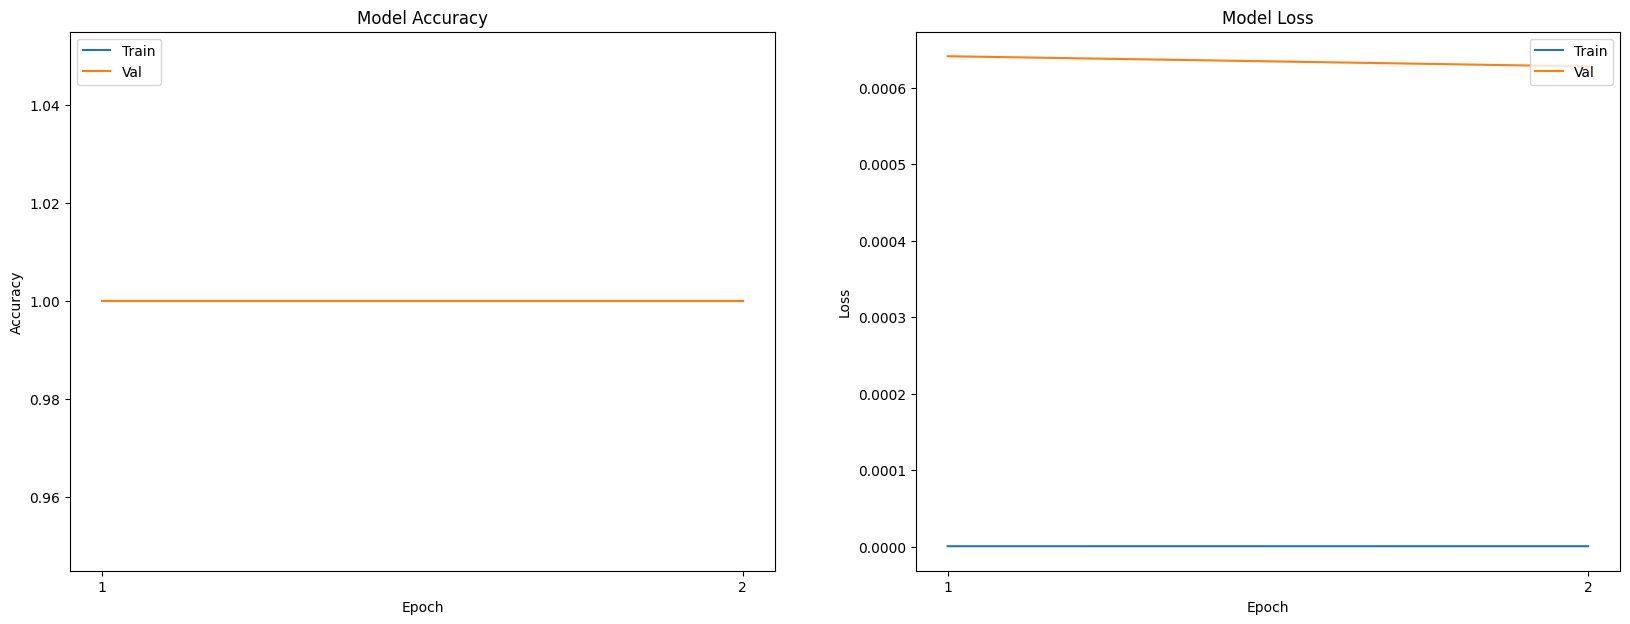

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(model.history.history["binary_accuracy"])
plt.plot(model.history.history["val_binary_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
#plt.xticks(np.arange(0, len(model.history.history["binary_accuracy"]), 1))

plt.xticks(np.arange(len(model.history.history["binary_accuracy"])), np.arange(1, len(model.history.history["binary_accuracy"])+1, 1))

plt.subplot(1, 2, 2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(len(model.history.history["loss"])), np.arange(1, len(model.history.history["loss"])+1, 1))
plt.show()

In [7]:
dataset_zip = zipfile.ZipFile('drive/MyDrive/Deep/test1.zip', 'r')

dataset_zip.extractall()

dataset_zip.close()

In [16]:
test_list = glob.glob("test1/*.jpg")

In [17]:
x_test = []

for i in tqdm(test_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    x_test.append((np.array(temp) - np.mean(temp)) / np.std(temp))
print("test images loading is done")

100%|██████████| 12500/12500 [01:00<00:00, 205.91it/s]

test images loading is done


In [18]:
a = np.asarray(x_test)
x_test = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [19]:
del(a)

In [28]:
result = model.predict(x=x_test)

391/391 [==============================] - 9s 4ms/step


In [29]:
idx = []
for i in test_list:
    idx.append(i[21:-4])

In [30]:
result = result.reshape(result.shape[0])
result[result>0.5] = 1
result[result<0.5] = 0

In [31]:
submission = {"id": idx, "label": result}

In [32]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)

In [33]:
pd.DataFrame(submission)

,id,label
0,,0.0
1,,0.0
2,,0.0
3,,0.0
4,,0.0
...,...,...
12495,,0.0
12496,,0.0
12497,,0.0
12498,,0.0
